In [31]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [32]:
new_line='_*'*50

In [33]:
#read train and test data 
train=pd.read_csv("train.csv")
print(train.shape)
print(new_line)
print(train.info())
print(new_line)
print(train.head(5))
print(new_line)
print(train.describe())
print(new_line)
print(train.dtypes)

(18524, 9)
_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB
None
_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_*_

In [34]:

numerical_features=train.select_dtypes(include='number').columns
numerical_features
print(train[numerical_features][0:5])
train[numerical_features]=train[numerical_features].fillna(train[numerical_features].mean())
print(train[numerical_features][0:5])


   id  Time_spent_Alone  Social_event_attendance  Going_outside  \
0   0               0.0                      6.0            4.0   
1   1               1.0                      7.0            3.0   
2   2               6.0                      1.0            0.0   
3   3               3.0                      7.0            3.0   
4   4               1.0                      4.0            4.0   

   Friends_circle_size  Post_frequency  
0                 15.0             5.0  
1                 10.0             8.0  
2                  3.0             0.0  
3                 11.0             5.0  
4                 13.0             NaN  
   id  Time_spent_Alone  Social_event_attendance  Going_outside  \
0   0               0.0                      6.0            4.0   
1   1               1.0                      7.0            3.0   
2   2               6.0                      1.0            0.0   
3   3               3.0                      7.0            3.0   
4   4           

In [35]:
non_numerical_features=train.select_dtypes(exclude='number').columns
non_numerical_features
print(train[non_numerical_features][0:5])

for feature in non_numerical_features:
    train[feature]=train[feature].fillna(train[feature].mode()[0])
print(train[non_numerical_features][0:5])

  Stage_fear Drained_after_socializing Personality
0         No                        No   Extrovert
1         No                        No   Extrovert
2        Yes                       NaN   Introvert
3         No                        No   Extrovert
4         No                        No   Extrovert
  Stage_fear Drained_after_socializing Personality
0         No                        No   Extrovert
1         No                        No   Extrovert
2        Yes                        No   Introvert
3         No                        No   Extrovert
4         No                        No   Extrovert


In [36]:
print(train[0:5])
features=['Stage_fear','Drained_after_socializing','Personality']
category_mappings = [{
        'No': 0,
        'Yes': 1
    },
    {   'No': 0,
        'Yes': 1},
    {   'Extrovert': 0,
        'Introvert': 1}]

for feature, mappings in zip(features, category_mappings):
    train[feature] = train[feature].map(mappings)
train[0:5]


   id  Time_spent_Alone Stage_fear  Social_event_attendance  Going_outside  \
0   0               0.0         No                      6.0            4.0   
1   1               1.0         No                      7.0            3.0   
2   2               6.0        Yes                      1.0            0.0   
3   3               3.0         No                      7.0            3.0   
4   4               1.0         No                      4.0            4.0   

  Drained_after_socializing  Friends_circle_size  Post_frequency Personality  
0                        No                 15.0        5.000000   Extrovert  
1                        No                 10.0        8.000000   Extrovert  
2                        No                  3.0        0.000000   Introvert  
3                        No                 11.0        5.000000   Extrovert  
4                        No                 13.0        4.982097   Extrovert  


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,0,6.0,4.0,0,15.0,5.000000,0
1,1,1.0,0,7.0,3.0,0,10.0,8.000000,0
2,2,6.0,1,1.0,0.0,0,3.0,0.000000,1
3,3,3.0,0,7.0,3.0,0,11.0,5.000000,0
4,4,1.0,0,4.0,4.0,0,13.0,4.982097,0


In [62]:
Featrures_to_be_ints=['Time_spent_Alone','Social_event_attendance','Going_outside','Friends_circle_size','Post_frequency']
for feat in Featrures_to_be_ints:
    train[feat]=train[feat].astype(int)
    train[feat]=train[feat].clip(0,11)

In [38]:
train=train.drop('id',axis=1)

In [68]:
train[0:5]

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0,6,4,0,11,5,0
1,1,0,7,3,0,10,8,0
2,6,1,1,0,0,3,0,1
3,3,0,7,3,0,11,5,0
4,1,0,4,4,0,11,4,0


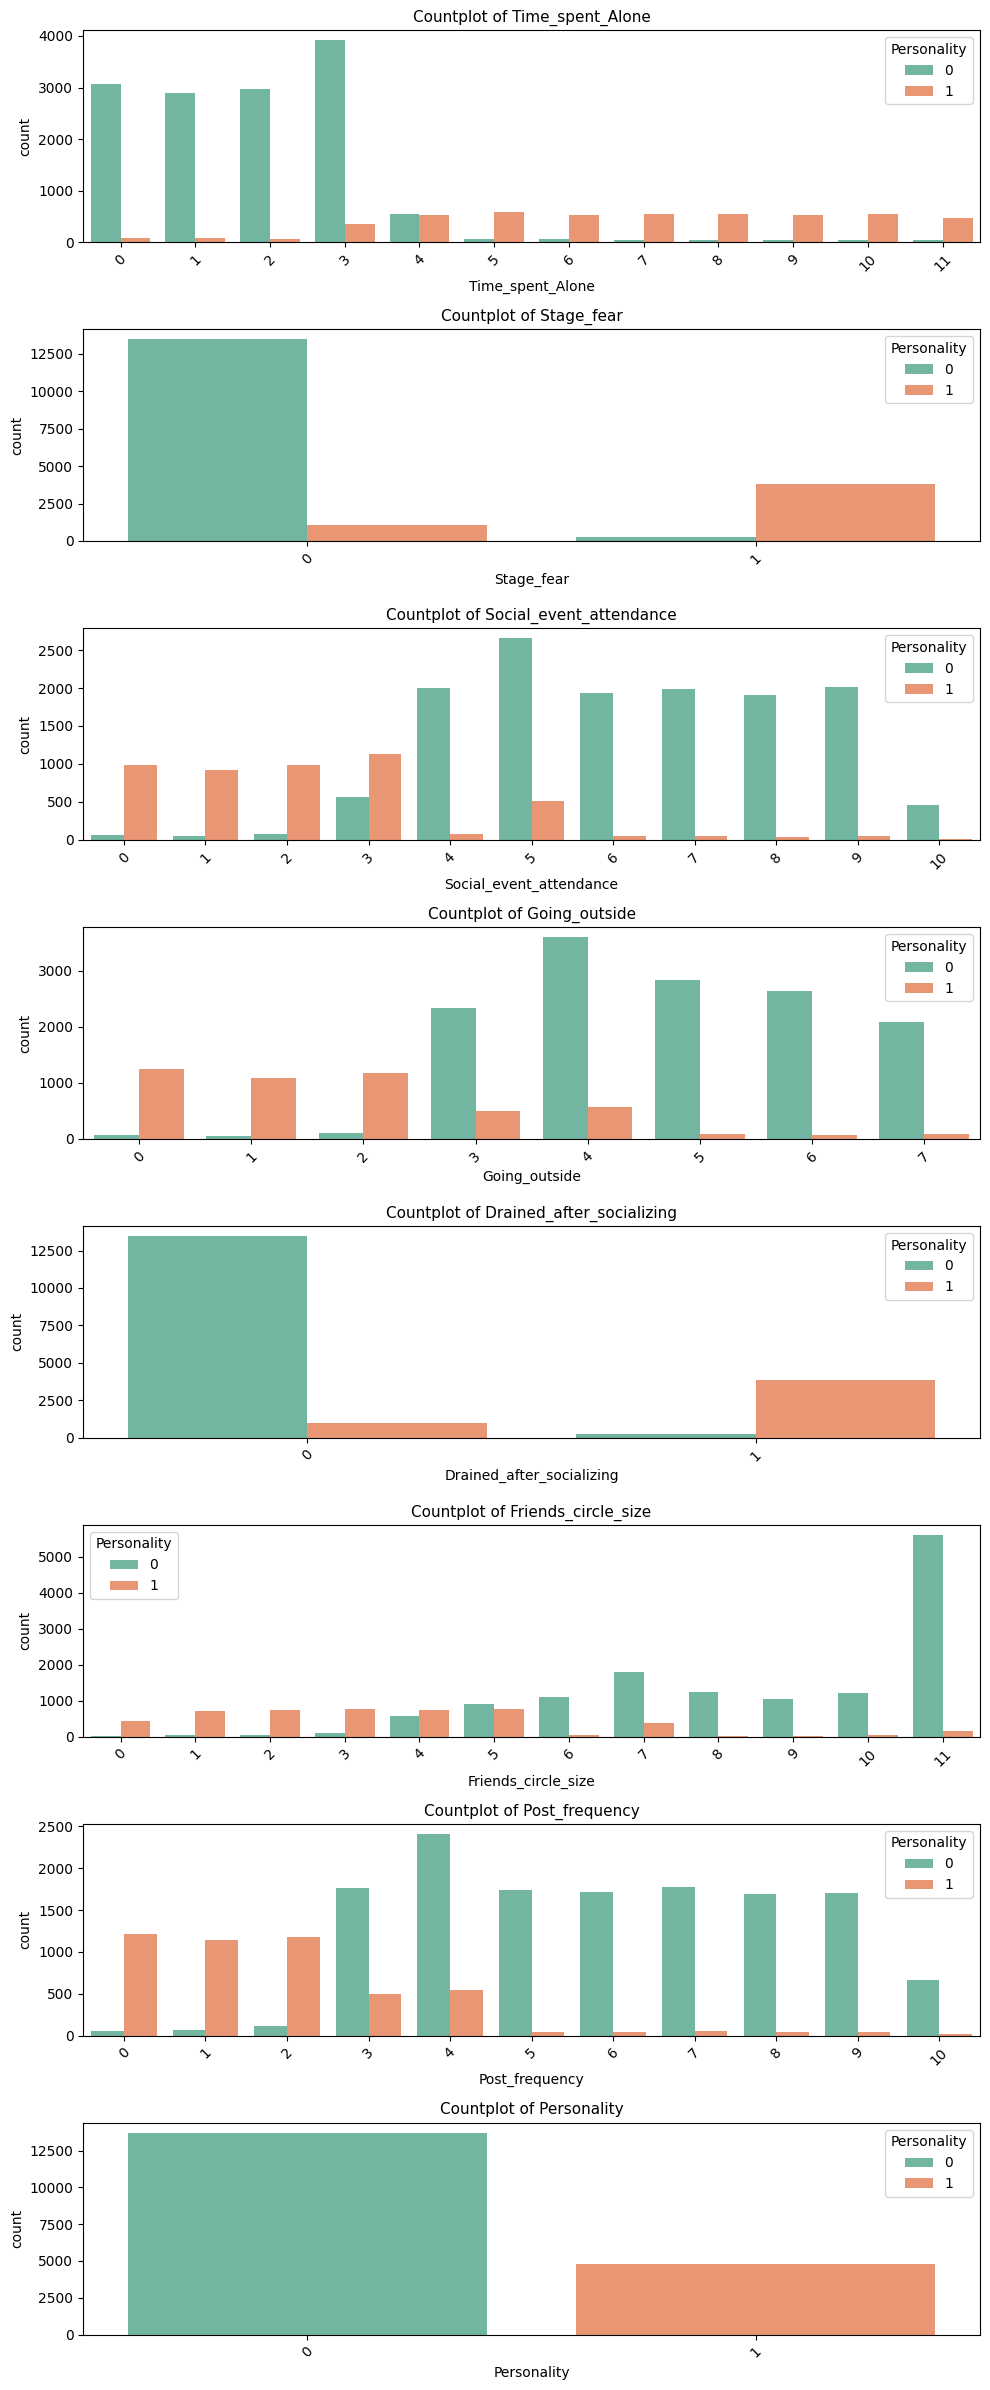

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# numerical_cols = train.select_dtypes(include=['number']).columns
# #fig, ax = plt.subplots(5,1,figsize=(10, 15))
# fig, ax = plt.subplots(len(numerical_cols), 1, figsize=(10, 3 * len(numerical_cols)))

# #numerical_cols = train.select_dtypes(include=['number']).columns

# for i, col in enumerate(numerical_cols):
#     sns.countplot(x=col, data=train, ax=ax[i], palette="Set2", hue="Personality")
#     ax[i].set_title(f"Countplot of {col}", fontsize=11)
#     ax[i].tick_params(axis="x" , rotation=45)

# plt.tight_layout()
# plt.show()

In [69]:
X=train.drop(['Personality'],axis=1)
y_t=train['Personality']

In [70]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_t, test_size=0.2, random_state=42)


In [71]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
clf.score(X_test, y_test)


0.9373819163292848

In [74]:
#print feature importance 
for feat, imp in zip(train.columns, clf.feature_importances_):
    print(feat,imp)


Time_spent_Alone 0.04271864242388518
Stage_fear 0.17255655855802404
Social_event_attendance 0.028362225792588545
Going_outside 0.016741402044197502
Drained_after_socializing 0.6982400995534439
Friends_circle_size 0.02122820146169164
Post_frequency 0.020152870166169234
